40077220102

In [2]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
from torch.utils.data.sampler import SubsetRandomSampler
from torch.autograd import Variable

In [3]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Download and load training data
trainset = datasets.FashionMNIST('./data',download=True, train= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)

# Download and load test data
testset = datasets.FashionMNIST('./data',download=True, train= False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size= 64, shuffle=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


tensor([9, 0, 0,  ..., 3, 0, 5])
tensor([9, 0, 0,  ..., 3, 0, 5])
tensor([9, 0, 0,  ..., 3, 0, 5])
tensor([9, 0, 0,  ..., 3, 0, 5])
tensor([9, 0, 0,  ..., 3, 0, 5])
tensor([9, 0, 0,  ..., 3, 0, 5])
tensor([9, 0, 0,  ..., 3, 0, 5])
tensor([9, 0, 0,  ..., 3, 0, 5])
tensor([9, 0, 0,  ..., 3, 0, 5])


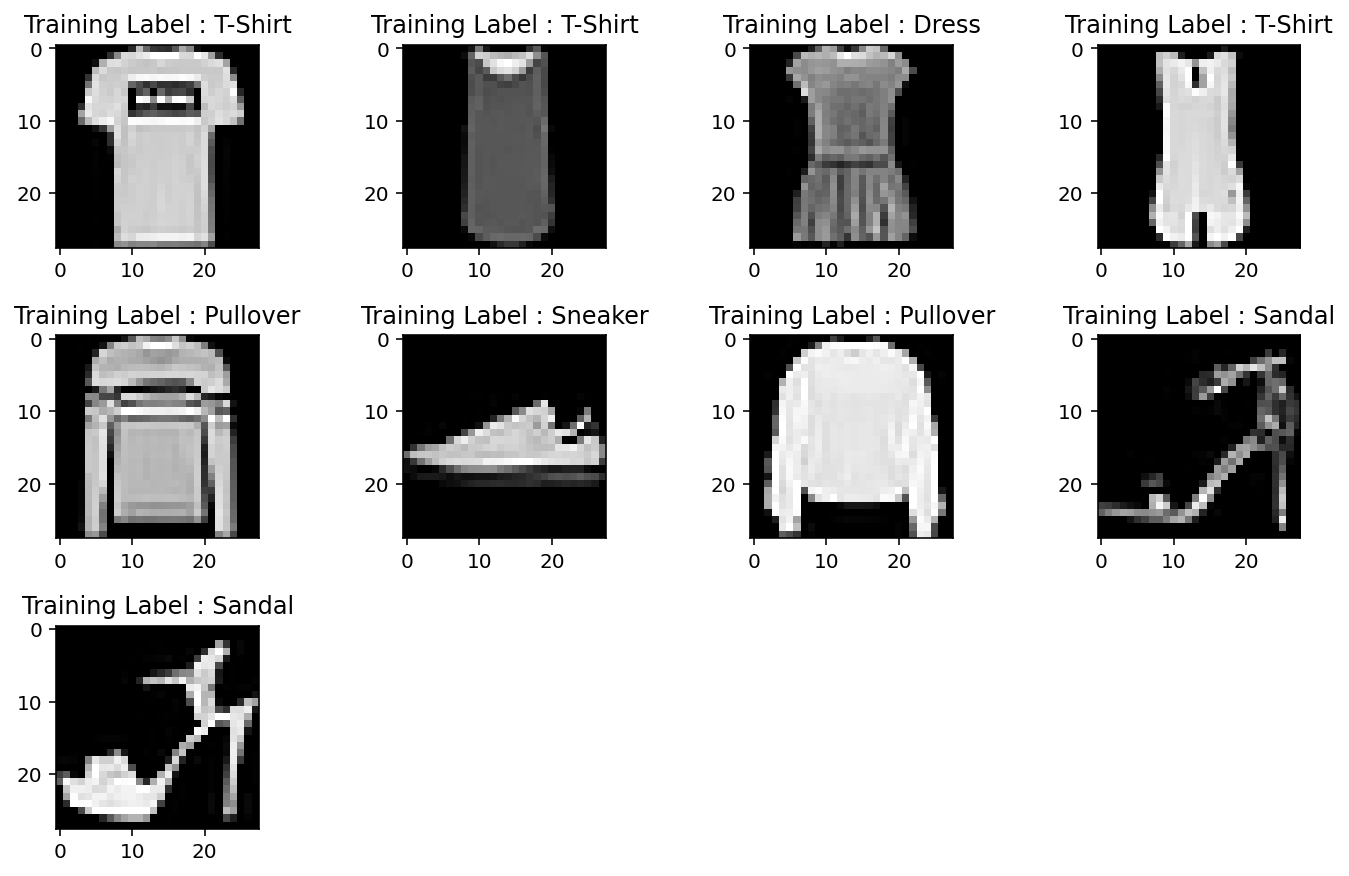

In [ ]:
labels_map = ('T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle Boot')
fig = plt.figure(figsize=(10,10));
columns = 4;
rows = 5;
for i in range(1, 10):
    print(trainset.train_labels)
    fig.add_subplot(rows, columns, i)
    fig.tight_layout()
    plt.imshow(trainset.train_data[i].numpy(), cmap='gray')
    plt.title('Training Label : %s' % labels_map[trainset.train_labels[i]])
plt.show()

## Part a

In [ ]:
input_size = 784
out_size = 10

In [ ]:
## Define the model
################ Your code ############
model = nn.Sequential(
            nn.Linear(784 ,600 ),
            nn.ReLU(),
            nn.Linear(600 , 600),
            nn.ReLU(),
            nn.Linear(600 , 10),
            nn.LogSoftmax()

)
#######################################

In [ ]:
################ Your code ############
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
#######################################

In [ ]:
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=600, bias=True)
  (1): ReLU()
  (2): Linear(in_features=600, out_features=600, bias=True)
  (3): ReLU()
  (4): Linear(in_features=600, out_features=10, bias=True)
  (5): LogSoftmax(dim=None)
)


In [ ]:
## Train your model
epochs = 10

# Lists for knowing classwise accuracy

for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    
    images = images.view(images.shape[0],-1) #sqash the image in to 784*1 vector

    #reset the default gradients
    optimizer.zero_grad()
    
    # forward pass
    ################ Your code ############
    output = model(images)
    loss = criterion(output, labels)
    #######################################
    #backward pass calculate the gradients for loss
    loss.backward()
    #backward pass calculate the gradients for loss
    optimizer.step()

    running_loss = running_loss+loss.item()
  
  print(f"Training loss: {running_loss/len(trainloader)}")


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Training loss: 0.3017598070553752
Training loss: 0.21628437351697544
Training loss: 0.19223529064674366
Training loss: 0.1780912439420279
Training loss: 0.1718418008264607
Training loss: 0.16118162178368903
Training loss: 0.15441350926007671
Training loss: 0.14842582525196932
Training loss: 0.14571972785076734
Training loss: 0.1375994981943703


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Loss: 0.12784354388713837, Accuracy: 88.95999908447266%


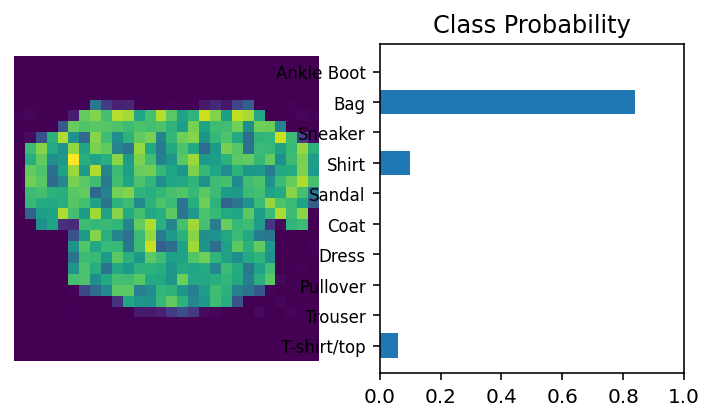

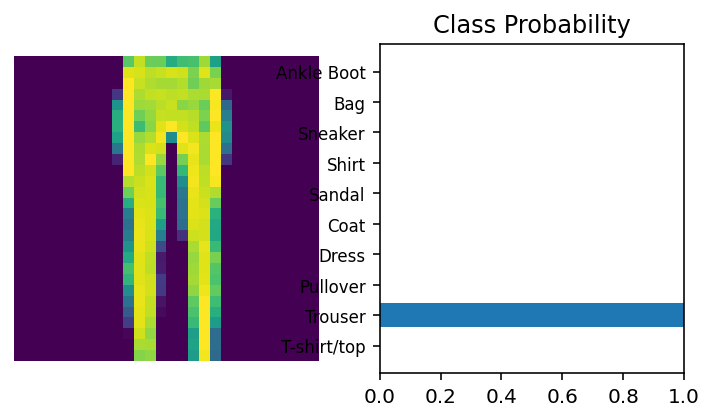

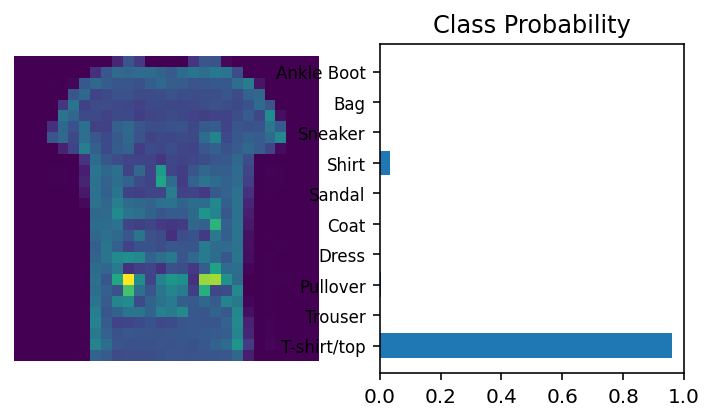

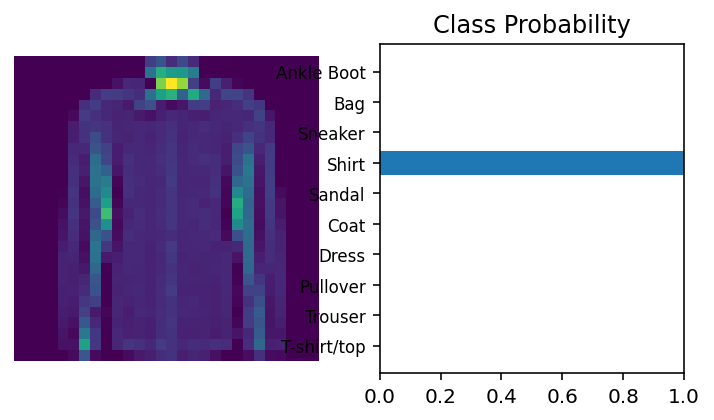

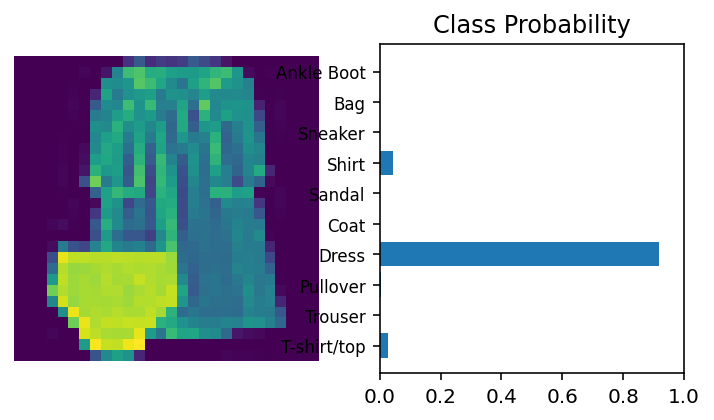

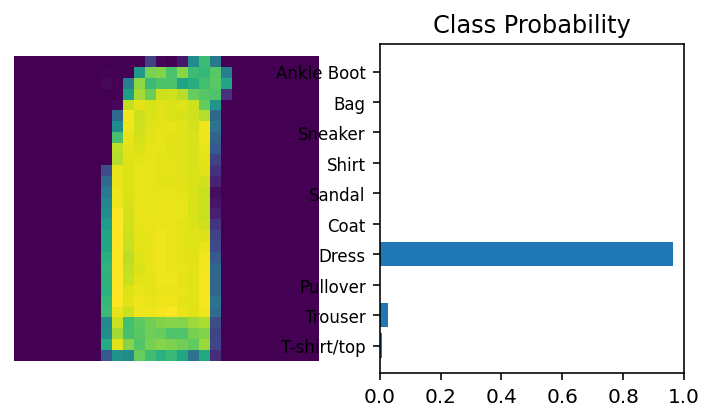

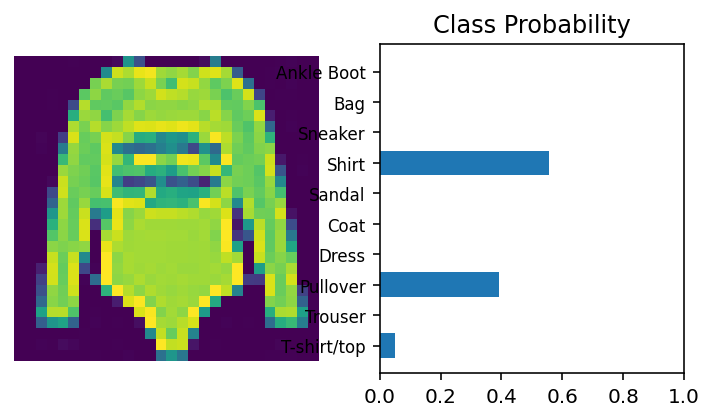

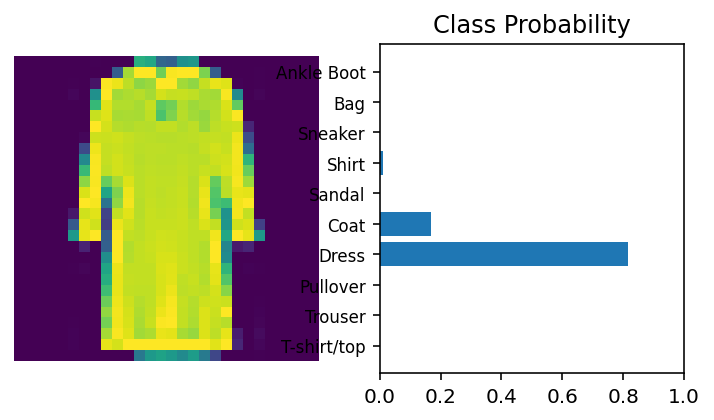

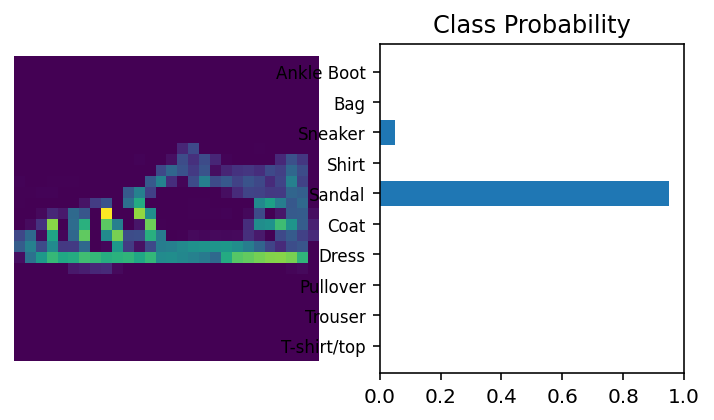

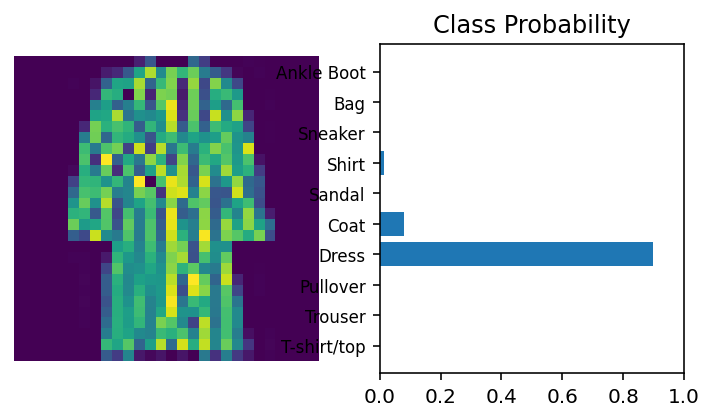

In [ ]:
## Test your model
################ Your code ############
predictions_list = []
correct = 0
total = 0
for images, labels in testloader:
  images2 = images.view(images.shape[0],-1) 
  #turn off the gradients
  with torch.no_grad():
    logps = model(images2)
  loss2 = criterion(logps, labels)
  predictions = torch.max(logps, 1)[1]
  predictions_list.append(predictions)
  correct += (predictions == labels).sum()
  loss2 = criterion(logps, labels)
  total += len(labels)
accuracy = correct * 100 / total
print("Loss: {}, Accuracy: {}%".format(loss2.data, accuracy))


#########################################################################plot
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

for i in  range(10) :
  dataiter = iter(testloader)
  images, labels = dataiter.next()
  img = images[0]
  # Convert 2D image to 1D vector
  img = img.resize_(1, 784)

#turn off the gradients
  with torch.no_grad():
    logps = model(img)
# TODO: Calculate the class probabilities (softmax) for img
  ps = torch.exp(logps)

  def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1)
  view_classify(img.resize_(1, 28, 28), ps)
#######################################

## Part b

In [ ]:
## Define the model
################ Your code ############
model2 = nn.Sequential(
            nn.Linear(784 ,1500 ),
            nn.ReLU(),
            nn.Linear(1500 , 1500),
            nn.ReLU(),
            nn.Linear(1500 , 10),
            nn.LogSoftmax()

)
#######################################

In [ ]:
################ Your code ############
criterion2 = nn.CrossEntropyLoss()
learning_rate2 = 0.001
optimizer2 = optim.Adam(model2.parameters(), lr=learning_rate2)
#######################################

In [ ]:

## Train your model
epochs = 40

# Lists for knowing classwise accuracy

for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    
    images = images.view(images.shape[0],-1) #sqash the image in to 784*1 vector

    #reset the default gradients
    optimizer2.zero_grad()
    
    # forward pass
    ################ Your code ############
    output = model2(images)
    loss = criterion2(output, labels)
    #######################################
    #backward pass calculate the gradients for loss
    loss.backward()
    #backward pass calculate the gradients for loss
    optimizer2.step()

    running_loss = running_loss+loss.item()
  
  print(f"Training loss: {running_loss/len(trainloader)}")


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Training loss: 0.44901810074920084
Training loss: 0.34707445486871674
Training loss: 0.3079290683351473
Training loss: 0.28546844396605164
Training loss: 0.2642947236921932
Training loss: 0.2475581733561528
Training loss: 0.23352028965664062
Training loss: 0.22051629107167472
Training loss: 0.20935392415504467
Training loss: 0.19878260157843516
Training loss: 0.19449425234532813
Training loss: 0.1880578286469237
Training loss: 0.19242825821391554
Training loss: 0.1670251831507632
Training loss: 0.1558276205353423
Training loss: 0.15238480616424446
Training loss: 0.14949064993702654
Training loss: 0.14315136041351234
Training loss: 0.1370998851335379
Training loss: 0.12967628497642272
Training loss: 0.130583160505223
Training loss: 0.12204264132365553
Training loss: 0.11916350604080633
Training loss: 0.1161396277895662
Training loss: 0.11517766328937591
Training loss: 0.1093061630353967
Training loss: 0.10361204824861148
Training loss: 0.102397990357657
Training loss: 0.1028766683670185

In [ ]:

## Test your model
################ Your code ############
predictions_list = []
correct = 0
total = 0
for images, labels in testloader:
  images2 = images.view(images.shape[0],-1) 
  #turn off the gradients
  with torch.no_grad():
    logps = model(images2)
  loss2 = criterion(logps, labels)
  ps = torch.exp(logps)
  predictions = torch.max(logps, 1)[1]
  predictions_list.append(predictions)
  correct += (predictions == labels).sum()
  loss2 = criterion(logps, labels)
  total += len(labels)
accuracy = correct * 100 / total
print("Loss: {}, Accuracy: {}%".format(loss2.data, accuracy))


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Loss: 0.6699567437171936, Accuracy: 89.2699966430664%


## Part c

**All Relu & CE**

In [4]:
model4 = nn.Sequential(
            nn.Linear(784 ,600 ),
            nn.ReLU(),
            nn.Linear(600 , 600),
            nn.ReLU(),
            nn.Linear(600 , 10),
            nn.ReLU()

)

In [6]:
################ Your code ############
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = optim.Adam(model4.parameters(), lr=learning_rate)
#######################################

In [7]:
## Train your model
epochs = 10

# Lists for knowing classwise accuracy

for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    
    images = images.view(images.shape[0],-1) #sqash the image in to 784*1 vector

    #reset the default gradients
    optimizer.zero_grad()
    
    # forward pass
    ################ Your code ############
    output = model4(images)
    loss = criterion(output, labels)
    #######################################
    #backward pass calculate the gradients for loss
    loss.backward()
    #backward pass calculate the gradients for loss
    optimizer.step()

    running_loss = running_loss+loss.item()
  
  print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.9248061974419713
Training loss: 0.5571702128248428
Training loss: 0.32414268185176065
Training loss: 0.28633390348762083
Training loss: 0.26396283127669334
Training loss: 0.24850139329269497
Training loss: 0.2342155922982675
Training loss: 0.22009772438802191
Training loss: 0.20967454005326672
Training loss: 0.1973976344505607


In [8]:

## Test your model
################ Your code ############
predictions_list = []
correct = 0
total = 0
for images, labels in testloader:
  images2 = images.view(images.shape[0],-1) 
  #turn off the gradients
  with torch.no_grad():
    logps = model4(images2)
  loss2 = criterion(logps, labels)
  ps = torch.exp(logps)
  predictions = torch.max(logps, 1)[1]
  predictions_list.append(predictions)
  correct += (predictions == labels).sum()
  loss2 = criterion(logps, labels)
  total += len(labels)
accuracy = correct * 100 / total
print("Loss: {}, Accuracy: {}%".format(loss2.data, accuracy))

Loss: 0.11737029254436493, Accuracy: 89.0999984741211%


In [10]:
model5 = nn.Sequential(
            nn.Linear(784 ,600 ),
            nn.LeakyReLU(0.1),
            nn.Linear(600 , 600),
            nn.LeakyReLU(0.1),
            nn.Linear(600 , 10),
            nn.LeakyReLU(0.1)

)

In [23]:
################ Your code ############
criterion5 = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer5 = optim.Adam(model5.parameters(), lr=learning_rate)

In [24]:
## Train your model
epochs = 10

# Lists for knowing classwise accuracy

for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    
    images = images.view(images.shape[0],-1) #sqash the image in to 784*1 vector

    #reset the default gradients
    optimizer5.zero_grad()
    
    # forward pass
    ################ Your code ############
    output = model5(images)
    loss = criterion5(output, labels)
    #######################################
    #backward pass calculate the gradients for loss
    loss.backward()
    #backward pass calculate the gradients for loss
    optimizer5.step()

    running_loss = running_loss+loss.item()
  
  print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.46112907236255307
Training loss: 0.35210838098960645
Training loss: 0.32413756360472645
Training loss: 0.29667906253052545
Training loss: 0.28283636131361606
Training loss: 0.26556421976798633
Training loss: 0.2539350028826929
Training loss: 0.2388182705534356
Training loss: 0.23386397381930718
Training loss: 0.22323821823416487


In [25]:

## Test your model
################ Your code ############
predictions_list = []
correct = 0
total = 0
for images, labels in testloader:
  images2 = images.view(images.shape[0],-1) 
  #turn off the gradients
  with torch.no_grad():
    logps = model5(images2)
  loss2 = criterion5(logps, labels)
  ps = torch.exp(logps)
  predictions = torch.max(logps, 1)[1]
  predictions_list.append(predictions)
  correct += (predictions == labels).sum()
  loss2 = criterion5(logps, labels)
  total += len(labels)
accuracy = correct * 100 / total
print("Loss: {}, Accuracy: {}%".format(loss2.data, accuracy))

Loss: 0.33830171823501587, Accuracy: 87.41000366210938%


In [13]:
model6 = nn.Sequential(
            nn.Linear(784 ,600 ),
            nn.Softmax(dim=1),
            nn.Linear(600 , 600),
            nn.Softmax(dim=1),
            nn.Linear(600 , 10),
            nn.Softmax(dim=1)

)

In [20]:
################ Your code ############
criterion6 = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer6 = optim.Adam(model6.parameters(), lr=learning_rate)

In [21]:
## Train your model
epochs = 10

# Lists for knowing classwise accuracy

for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    
    images = images.view(images.shape[0],-1) #sqash the image in to 784*1 vector

    #reset the default gradients
    optimizer6.zero_grad()
    
    # forward pass
    ################ Your code ############
    output = model6(images)
    loss = criterion6(output, labels)
    #######################################
    #backward pass calculate the gradients for loss
    loss.backward()
    #backward pass calculate the gradients for loss
    optimizer6.step()

    running_loss = running_loss+loss.item()
  
  print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 2.2677591723928066
Training loss: 2.018985055402906
Training loss: 1.9027397027656214
Training loss: 1.886564132247144
Training loss: 1.8796059310054982
Training loss: 1.8793143814306523
Training loss: 1.8769461090630815
Training loss: 1.8744917107797634
Training loss: 1.8741566210921639
Training loss: 1.8597288054189702


In [22]:

## Test your model
################ Your code ############
predictions_list = []
correct = 0
total = 0
for images, labels in testloader:
  images2 = images.view(images.shape[0],-1) 
  #turn off the gradients
  with torch.no_grad():
    logps = model6(images2)
  loss2 = criterion6(logps, labels)
  ps = torch.exp(logps)
  predictions = torch.max(logps, 1)[1]
  predictions_list.append(predictions)
  correct += (predictions == labels).sum()
  loss2 = criterion6(logps, labels)
  total += len(labels)
accuracy = correct * 100 / total
print("Loss: {}, Accuracy: {}%".format(loss2.data, accuracy))

Loss: 1.835360050201416, Accuracy: 60.779998779296875%
